# Notebook for Data Preprocessing

A notebook for preprocessing raw data files in `taobao-mm/raw`.

In the notebook, we provide a demonstrative data processing pipeline. Note that some cells take considerable time to run; for better stability, we recommend wrapping these cells into Python scripts and running them in the background.

## Preview Raw Data

We provide a demo version of the raw data in folder `data_demo` (each Parquet file contains ten lines).

In [6]:
# see all raw data files
import os
for f in os.listdir("data_demo"):
    print(f)

item_features.parquet
scl_embedding_int8_p90.parquet
test_samples.parquet
test_user_features.parquet
train_samples.parquet
train_user_features.parquet


Preview raw data through `data_demo`.

In [7]:
# to preview raw data
import os
import pandas as pd

preview_file_name = "train_user_features.parquet"

df = pd.read_parquet(os.path.join("data_demo", preview_file_name ))
df_head = df.head(5)

df_head

,129_1,130_1,130_2,130_3,130_4,130_5,150_2_180,151_2_180
0,-1000233199594900771,-7446916648201533712,-7843689117495056247,307448716246778523,-3348858682735825597,0,"[-3158540113177114857, 4382780109111517843, 43...","[-4316783378234398615, -6828982681627434719, -..."
1,-1000251790414400706,-3266576381013309554,-7843689117495056247,-33505861305355642,3774229787754152908,746762829127501960,"[3159554014526329391, 1237298318129345829, 737...","[-2027636298158336783, 6389353017430856883, 63..."
2,-1000363214928708397,-1703000253499410570,-1616921968146500504,3280809593783020520,-3539993763276992276,602994839685422785,"[-6006244408081197342, 1554443880083058720, -7...","[-3428088490955217179, 2421902788023766924, 24..."
3,-1000809285049654851,2462676316711722248,-1616921968146500504,-8772831573382901199,2597804427213355318,2462676316711722248,"[8359304794744331228, 3491991288200521428, -45...","[2421902788023766924, -4823507731448378248, 17..."
4,-1000866309912137970,2593208677638477497,-1616921968146500504,-4566746158473221506,-3232010122209647997,602994839685422785,"[2747634159998045797, 5341307701219998729, 274...","[8083541150310180869, 230488010003729208, 8083..."


Preview train/test samples.

In [30]:
# to preview train/test samples
import pandas as pd

df = pd.read_parquet("taobao-mm/train/train-shard-000000.parquet")
# df = pd.read_parquet("taobao-mm/test/test-shard-000000.parquet")
df_head = df.head(5)

df_head

,label_0,129_1,130_1,130_2,130_3,130_4,130_5,150_2_180,151_2_180,205,206,213,214
0,"[1, 0]",3845836564792165161,-7446916648201533712,-1616921968146500504,5955311844451486081,-2051062740800909600,2462676316711722248,"[2340704908271206893, 635866542358938445, -654...","[-2027636298158336783, 2421902788023766924, -5...",2620107170441809109,415361509518425685,3877744707800971452,-1893348562416248840
1,"[1, 0]",3845836564792165161,-7446916648201533712,-1616921968146500504,5955311844451486081,-2051062740800909600,2462676316711722248,"[2340704908271206893, 635866542358938445, -654...","[-2027636298158336783, 2421902788023766924, -5...",-9210895210650225978,-4823507731448378248,-1534703480116859450,5198818764361097254
2,"[1, 0]",3845836564792165161,-7446916648201533712,-1616921968146500504,5955311844451486081,-2051062740800909600,2462676316711722248,"[2340704908271206893, 635866542358938445, -654...","[-2027636298158336783, 2421902788023766924, -5...",-3338069202323709424,-4823507731448378248,-1534703480116859450,5198818764361097254
3,"[1, 0]",-8566638082587873890,2593208677638477497,-1616921968146500504,-8772831573382901199,-4106084359338819312,2462676316711722248,"[6721275958852577806, 9102817093836746923, 102...","[-9006272157955270177, -9006272157955270177, -...",-3369875596323140450,-545999441040461044,-1534703480116859450,5198818764361097254
4,"[1, 0]",-8566638082587873890,2593208677638477497,-1616921968146500504,-8772831573382901199,-4106084359338819312,2462676316711722248,"[6721275958852577806, 9102817093836746923, 102...","[-9006272157955270177, -9006272157955270177, -...",6595332559549384877,4889735312874018725,-8796884784858241868,-8796884784858241868


In [ ]:
# SCL embeddings are originally of type float32. 
# To improve computational efficiency and reduce storage space, we convert them to int8 using the following function.

import numpy as np

def convert_scl_emb_int8(embeddings):
    embeddings = np.array(embeddings)
    embeddings_clipped = np.clip(embeddings, -1.0, 1.0)
    int8_embeddings = np.trunc(embeddings_clipped * 127).astype(np.int8)
    return int8_embeddings

# We do not currently provide original float32 scl embeddings.
# Float32 scl embeddings can be **approximated** using the following function.

def convert_scl_emb_float32(embeddings):
    embeddings = np.array(embeddings)
    return embeddings.astype(np.float32) / 127

import pandas as pd 

SCL_FILE_PATH = "data_demo/scl_embedding_int8_p90.parquet"
df = pd.read_parquet(SCL_FILE_PATH)
ids = df['205'].values
int8_embeddings = np.stack(df['205_c'].values)
print("Int8 Embedding:\n", int8_embeddings[0])
float32_embeddings = convert_scl_emb_float32(int8_embeddings)
print("Float32 Embedding:\n", float32_embeddings[0])

Int8 Embedding:
 [ 12  12   2  21 -22   8 -12  -1  11  -6 -11  -6  -6   6   0 -10   1 -12
 -10  -9   5  -2 -17 -14   8   0   0  14  -4 -10  -8   1   3  -7 -20  14
  -1  -9   0   1   2   6   7  -9 -29  23   6  -8  -3  12  -6   3  -2   2
 -13   0  -4   3   7   9  24 -14   9   1 -15   7  -1  -7  14  -1  -9  -2
 -10  -8   2  15  10  15 -17   1  -3 -12  10 -16  -1   8   3  14  19  -2
 -23  13 -13 -17 -14   2  10 -22   4 -19 -19  13  -6  13   3   5 -13  -3
  -8   3 -16 -25  -1   4   8  -2  -2 -10  -2  -2  -2  -1  -1  -2  -2  -2
  -1 -26]
Float32 Embedding:
 [ 0.09448819  0.09448819  0.01574803  0.16535433 -0.17322835  0.06299213
 -0.09448819 -0.00787402  0.08661418 -0.04724409 -0.08661418 -0.04724409
 -0.04724409  0.04724409  0.         -0.07874016  0.00787402 -0.09448819
 -0.07874016 -0.07086615  0.03937008 -0.01574803 -0.13385826 -0.11023622
  0.06299213  0.          0.          0.11023622 -0.03149606 -0.07874016
 -0.06299213  0.00787402  0.02362205 -0.05511811 -0.15748031  0.11023622
 -0.

## Forming ID Vocabularies

Count the number of unique values ​​for each ID field and then build a vocabulary for each of them.

We first define a function `count_ID_frequency` to count the frequency of each unique ID for each ID field in each Parquet file.

In [ ]:
import json
from datetime import datetime
from collections import defaultdict

import pyarrow.parquet as pq

def count_ID_frequency(file_name, feat_fn, input_dir="taobao-mm/raw", output_dir="taobao-mm/statistics"):
    # file_name = "train_user_features.parquet"
    # feat_fn = ["129_1", "130_1", "130_2", "130_3", "130_4", "130_5", "150_2_180", "151_2_180"]
    file_name_prefix = file_name.split(".")[0]
    parquet_file = os.path.join(input_dir, file_name)
    parquet_file = pq.ParquetFile(parquet_file)
    total_rows = 0

    freq_dicts = {name: defaultdict(int) for name in feat_fn}

    for i, batch in enumerate(parquet_file.iter_batches(batch_size=500_000)):
        df: pd.DataFrame = batch.to_pandas()
        total_rows += len(df)
        print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}] Processing the {i+1}th batch... Current total {total_rows:,} rows")

        for name in feat_fn:
            assert name in df.columns
            series = df[name]
            if name in ["150_2_180", "151_2_180"]:
                exploded = series.explode() # [ [a,b], [c], ... ] → [a, b, c, ...]
                for val in exploded.astype(int):
                    freq_dicts[name][val] += 1
            else:
                for val in series.astype(int):
                    freq_dicts[name][val] += 1

    summary = {}
    for name in feat_fn:
        counter = freq_dicts[name]
        sorted_items = sorted(counter.items(), key=lambda x: x[1], reverse=True)  # Sort by frequency in descending order

        freq_file = f"{output_dir}/{file_name_prefix}_{name}_freq.json"
        with open(freq_file, "w", encoding="utf-8") as f:
            json.dump({str(k): int(v) for k, v in sorted_items}, f, indent=2, ensure_ascii=False)

        total_ids = len(sorted_items)
        top10_freq = sum(count for _, count in sorted_items[:10])
        min_freq = sorted_items[-1][1]
        max_freq = sorted_items[0][1]

        summary[name] = {
            "unique_count": total_ids,
            "total_occurrences": sum(count for _, count in sorted_items),
            "top1_freq": max_freq,
            "top1_value": sorted_items[0][0],
            "min_freq": min_freq,
            "top10_coverage": f"{top10_freq / sum(count for _, count in sorted_items):.2%}"
        }

        print(f"  '{name}' → Unique values: {total_ids:,}, Highest frequency: {max_freq}, Lowest frequency: {min_freq}")

import os
os.makedirs("taobao-mm/statistics", exist_ok=True)

In [7]:
# ⚠️ Note: Running the following code will take a considerable amount of time.

config_dicts = [
    {
        "file_name": "item_features.parquet",
        "feat_fn": ["205", "206", "213", "214"]
    },
    {
        "file_name": "train_user_features.parquet",
        "feat_fn": ["129_1", "130_1", "130_2", "130_3", "130_4", "130_5", "150_2_180", "151_2_180"]
    }
]

for config_dict in config_dicts:
    count_ID_frequency(config_dict["file_name"], config_dict["feat_fn"])

[2026-01-12 01:17:52] Processing the 1th batch... Current total 500,000 rows
[2026-01-12 01:17:52] Processing the 2th batch... Current total 1,000,000 rows
[2026-01-12 01:17:53] Processing the 3th batch... Current total 1,500,000 rows
[2026-01-12 01:17:53] Processing the 4th batch... Current total 2,000,000 rows
[2026-01-12 01:17:53] Processing the 5th batch... Current total 2,500,000 rows
[2026-01-12 01:17:54] Processing the 6th batch... Current total 3,000,000 rows
[2026-01-12 01:17:54] Processing the 7th batch... Current total 3,500,000 rows
[2026-01-12 01:17:55] Processing the 8th batch... Current total 4,000,000 rows
[2026-01-12 01:17:55] Processing the 9th batch... Current total 4,164,497 rows
  '205' → Unique values: 4,164,497, Highest frequency: 1, Lowest frequency: 1
  '206' → Unique values: 13,050, Highest frequency: 82473, Lowest frequency: 1
  '213' → Unique values: 543, Highest frequency: 575866, Lowest frequency: 1
  '214' → Unique values: 122, Highest frequency: 1417424,

Analyze the frequency quantiles of items that appearing in users' behavior history (corresponding to field `150_2_180`).

In [8]:
import numpy as np
import json

QUANTILES = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]

json_file = "taobao-mm/statistics/train_user_features_150_2_180_freq.json"
with open(json_file, 'r') as f:
    user_hist_item_freq = json.load(f)

freq_list = sorted(user_hist_item_freq.items(), key=lambda x: int(x[1]), reverse=True)
items, counts = zip(*freq_list)
counts = np.array(counts, dtype=np.int64)

cumsum = np.cumsum(counts)
total_freq = cumsum[-1]
cumulative_ratio = cumsum / total_freq

print(f"Total {len(freq_list):,} unique items, total interaction frequency: {total_freq:,}")
print("\nFrequency quantile statistics:")
print(f"{'quantile (%)':<8} {'minimum frequency'}")
print("-" * 20)

quantile_coverage = {}
for q in QUANTILES:
    idx = np.searchsorted(cumulative_ratio, q, side='right')
    if idx >= len(counts):
        idx = len(counts) - 1
    min_freq_at_q = counts[idx]
    covered_ratio = cumulative_ratio[idx]
    quantile_coverage[q] = {
        "min_freq": int(min_freq_at_q),
        "cumulative_ratio": float(covered_ratio),
        "num_items": idx + 1
    }
    print(f"{int(q*100):>6}%   {min_freq_at_q:>8}")

Total 243,153,410 unique items, total interaction frequency: 6,776,686,661

Frequency quantile statistics:
quantile (%) minimum frequency
--------------------
    10%       7673
    20%       3118
    30%       1610
    40%        902
    50%        514
    60%        285
    70%        146
    80%         61
    90%         17
    95%          6
    99%          1


Draw a frequency distribution histogram for Item IDs in user's behavior history.

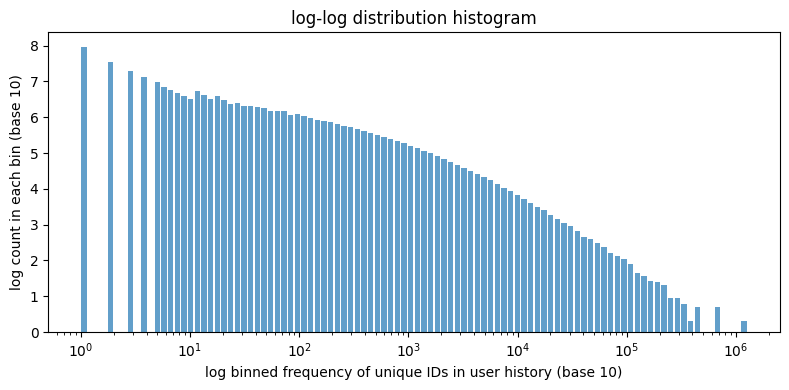

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_log_binned_histogram_with_log_counts(
    data, 
    num_bins=10, 
    log_base=10, 
    add_one=True,
    figsize=(8,4),
    show_counts_on_bars=False
):
    data = np.array(data)
    
    data = data[data > 0]
    
    log_min = np.log10(data.min())
    log_max = np.log10(data.max())
    bin_edges = np.logspace(log_min, log_max, num_bins + 1)
    
    counts, _ = np.histogram(data, bins=bin_edges)
    
    if add_one:
        log_counts = np.log(counts + 1) / np.log(log_base)
    else:
        with np.errstate(divide='ignore', invalid='ignore'):
            log_counts = np.log(counts) / np.log(log_base)
        log_counts = np.nan_to_num(log_counts, nan=0.0, neginf=0.0)

    fig, ax = plt.subplots(figsize=figsize)
    bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])
    
    bars = ax.bar(
        bin_centers, 
        log_counts, 
        width=np.diff(bin_edges) * 0.8,
        alpha=0.7, 
        # edgecolor='black',
        align='center'
    )
    
    ax.set_xscale('log')
    ax.set_xlabel('log binned frequency of unique IDs in user history (base 10)')
    ax.set_ylabel(f'log count in each bin (base 10)')
    ax.set_title('log-log distribution histogram')
    # ax.grid(True, which="both", ls="--", alpha=0.5)
    
    # x_labels = []
    # for i in range(len(bin_edges) - 1):
    #     low = bin_edges[i]
    #     high = bin_edges[i + 1]
    #     if low >= 1 and high <= 1e6:
    #         x_labels.append(f"[{int(low):,}, {int(high):,})")
    #     else:
    #         x_labels.append(f"[{low:.1e}, {high:.1e})")
    
    # ax.set_xticks(bin_centers)
    # ax.set_xticklabels(x_labels, rotation=45, ha='right')
    
    # if show_counts_on_bars:
    #     for bar, count in zip(bars, counts):
    #         height = bar.get_height()
    #         if height > 0:
    #             ax.text(
    #                 bar.get_x() + bar.get_width() / 2, 
    #                 height + max(log_counts) * 0.02, 
    #                 str(int(count)), 
    #                 ha='center', va='bottom', fontsize=9
    #             )
    
    plt.tight_layout()
    plt.show()

plot_log_binned_histogram_with_log_counts(
    counts, 
    num_bins=100, 
    log_base=10,
    add_one=True
)

We now have all the unique values for each ID field along with the count of unique values, denoted as `ID_SIZE`. Next, we will map each ID one-to-one to an integer in the range `[1, ID_SIZE]`, and use `0` to represent any unseen ID.

In [4]:
import os
import json
import numpy as np

def find_feq_json(feat_name, freq_json_files):
    freq_json_file = [f for f in freq_json_files if feat_name in f]
    print(freq_json_file)
    assert len(freq_json_file) == 1
    return freq_json_file[0]

def form_vocab_table(feat_name_list, json_file_path="taobao-mm/statistics", output_path="./npy"):
    freq_json_files = os.listdir(json_file_path)

    for feat_name in feat_name_list:
        freq_json_file = find_feq_json(feat_name, freq_json_files)
        with open(os.path.join(json_file_path, freq_json_file), "r") as f:
            freq_dict = json.load(f)

        # share embeddings
        if feat_name in ["150_2_180", "151_2_180"]:
            if feat_name == "150_2_180":
                target_json_file = find_feq_json("205", freq_json_files)
            if feat_name == "151_2_180":
                target_json_file = find_feq_json("206", freq_json_files)
            with open(os.path.join(json_file_path, target_json_file), "r") as f:
                target_freq_dict = json.load(f)
            
            merged = {**target_freq_dict, **freq_dict} 
            freq_dict = merged

        if "0" in freq_dict:
            del freq_dict["0"]

        sorted_id_list = sorted([int(k) for k in freq_dict.keys()])
        keys_int = np.array(sorted_id_list, dtype=np.int64)

        print(f"{feat_name} vocab size: {len(keys_int)}")
        np.save(os.path.join(output_path, f"{feat_name}_sorted_map.npy"), arr=keys_int)

feat_name_list = [
    "213", "214",
    "129_1", "130_1", "130_2", "130_3", "130_4", "130_5",
    "150_2_180", "151_2_180",
]
form_vocab_table(feat_name_list)

['item_features_213_freq.json']
213 vocab size: 542
['item_features_214_freq.json']
214 vocab size: 121
['train_user_features_129_1_freq.json']
129_1 vocab size: 6929671
['train_user_features_130_1_freq.json']
130_1 vocab size: 11
['train_user_features_130_2_freq.json']
130_2 vocab size: 3
['train_user_features_130_3_freq.json']
130_3 vocab size: 49
['train_user_features_130_4_freq.json']
130_4 vocab size: 493
['train_user_features_130_5_freq.json']
130_5 vocab size: 6
['train_user_features_150_2_180_freq.json']
['item_features_205_freq.json']
150_2_180 vocab size: 243363020
['train_user_features_151_2_180_freq.json']
['item_features_206_freq.json']
151_2_180 vocab size: 26397


## Forming Train/Test Samples

To construct the training sample table, we perform a **JOIN** operation between `train_samples`, `train_user_features`, and `item_features` on their respective IDs. The test sample table is generated analogously by joining `test_samples` with `test_user_features` and `item_features`.

We first define a function `form_sample_table` that leverages the `duckdb` library to perform **JOIN** operations between tables.

In [18]:
import os
from datetime import datetime

import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import duckdb

def t_print(input_str: str):
    """
    print with timestamp
    """
    print(f"[{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}] " + input_str)

def form_sample_table(mode: str, input_dir: str="taobao-mm/raw", output_dir: str = "./temp/"):

    os.makedirs(output_dir, exist_ok=True)

    if mode == "train":
        sample_file_name = "train_samples.parquet"
        user_file_name = "train_user_features.parquet"
    elif mode == "test":
        sample_file_name = "test_samples.parquet"
        user_file_name = "test_user_features.parquet"
    else:
        raise ValueError("mode must be 'train' or 'test'")
    
    item_file_name = "item_features.parquet"

    schema = [
        ('label_0', pa.list_(pa.int8())),
        ('129_1', pa.int64()), # udi
        ('130_1', pa.int64()), # u
        ('130_2', pa.int64()), # u
        ('130_3', pa.int64()), # u
        ('130_4', pa.int64()), # u
        ('130_5', pa.int64()), # u
        ('150_2_180', pa.list_(pa.int64())), # u
        ('151_2_180', pa.list_(pa.int64())), # u
        ('205', pa.int64()), # iid
        ('206', pa.int64()), # i
        ('213', pa.int64()), # i
        ('214', pa.int64()), # i
    ]
    schema = pa.schema(schema)

    t_print(f"🚀 Start to form {mode} sample table...")

    INPUT_DIR = input_dir
    OUTPUT_DIR = output_dir
    SAMPLE_FILE = os.path.join(INPUT_DIR, sample_file_name)
    ITEM_FILE = os.path.join(INPUT_DIR, item_file_name)
    USER_FILE = os.path.join(INPUT_DIR, user_file_name)
    OUTPUT_PATH = os.path.join(OUTPUT_DIR, mode)

    os.makedirs(OUTPUT_PATH, exist_ok=True)
    
    # ==============================
    # Step 1: Load item features into memory (small files).
    # ==============================
    t_print("📦 Loading item_features...")
    try:
        item_table = pq.read_table(ITEM_FILE)
        con = duckdb.connect()
        con.register("item_table", item_table)
        con.execute("CREATE OR REPLACE VIEW item_feat AS SELECT * FROM item_table")
    except Exception as e:
        t_print(f"❌ Failed to load item features: {e}")
        raise
    
    query = f"""
    SELECT 
        s."label_0",
        s."129_1",
        u."130_1",
        u."130_2",
        u."130_3",
        u."130_4",
        u."130_5",
        u."150_2_180",
        u."151_2_180",
        s."205",
        i."206",
        i."213",
        i."214"
    FROM '{SAMPLE_FILE}' AS s
    LEFT JOIN '{USER_FILE}' AS u ON s."129_1" = u."129_1"
    LEFT JOIN item_feat AS i ON s."205" = i."205"
    """
    
    # ==============================
    # Step 2: Using DuckDB for streaming JOIN and sharded writes
    # ==============================
    t_print("🔍 Perform efficient JOIN and sharded writes...")
    BATCH_SIZE = 100_000

    shard_id = 0
    total_rows = 0

    result = con.query(query).fetch_arrow_reader(batch_size=BATCH_SIZE)

    try:
        # Buffer variables
        batches_buffer = []           # Storing dataframes for multiple batches
        rows_in_current_shard = 0     # Accumulated rows of current shard
        TARGET_ROWS_PER_SHARD = 500_000

        for batch_idx, record_batch in enumerate(result):
            df = record_batch.to_pandas()

            # Dtype conversion
            for col in df.columns:
                expected_type = schema.field(col).type
                if pa.types.is_list(expected_type):
                    pass  # do nothing to List
                elif pa.types.is_int64(expected_type):
                    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype('int64')
                elif pa.types.is_int8(expected_type):
                    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype('int8')

            # Add into buffer
            batches_buffer.append(df)
            rows_in_current_shard += len(df)

            total_rows += len(df)

            # Write to a shard only when a sufficient number of rows have been accumulated
            if rows_in_current_shard >= TARGET_ROWS_PER_SHARD:
                # Merge all batches
                shard_df = pd.concat(batches_buffer, ignore_index=True)

                # Transform into PyArrow Table
                table = pa.Table.from_pandas(shard_df, schema=schema, preserve_index=False)

                # Write shard
                shard_file = os.path.join(OUTPUT_PATH, f"{mode}-shard-{shard_id:06d}.parquet")
                pq.write_table(
                    table,
                    shard_file,
                    row_group_size=10_000,
                    compression="ZSTD",
                    use_dictionary=False
                )

                # Log
                t_print(f" ✅ Writes to {mode}-shard-{shard_id:06d}.parquet, containing {len(shard_df):,} lines, processing a total of {total_rows:,} lines")

                # Reset buffer
                batches_buffer = []
                rows_in_current_shard = 0
                shard_id += 1

        # ==============================
        # Process the remaining data (less than a complete shard).
        # ==============================
        if batches_buffer:
            shard_df = pd.concat(batches_buffer, ignore_index=True)
            table = pa.Table.from_pandas(shard_df, schema=schema, preserve_index=False)

            shard_file = os.path.join(OUTPUT_PATH, f"{mode}-shard-{shard_id:06d}.parquet")
            pq.write_table(
                table,
                shard_file,
                row_group_size=10_000,
                compression="ZSTD",
                use_dictionary=False
            )
            t_print(f" ✅ Write the last {mode}-shard-{shard_id:06d}.parquet line containing {len(shard_df):,}")
            shard_id += 1

    except Exception as e:
        t_print(f"❌ Error occurred during processing: {e}")
        raise
    finally:
        result.close()

    
    t_print(f"🎉 {mode} sample table construction complete!")
    t_print(f" Total number of samples: {total_rows:,}")
    t_print(f" Number of shards: {shard_id}")
    t_print(f" Output path: {OUTPUT_PATH}")

    # ==============================
    # Step 3: Generate metadata.json
    # ==============================
    meta = {
        "mode": mode,
        "total_rows": total_rows,
        "num_shards": shard_id,
        "schema": [str(field) for field in schema],
        "created_at": pd.Timestamp.now().isoformat()
    }
    with open(os.path.join(OUTPUT_PATH, "metadata.json"), "w") as f:
        import json
        json.dump(meta, f, indent=2)

    t_print(f"📌 Metadata has been saved to {os.path.join(OUTPUT_PATH, 'metadata.json')}")

In [19]:
# ⚠️ Note: Running the following code will take a considerable amount of time.

# form_sample_table("train")
form_sample_table("test")

[2026-01-12 15:23:42] 🚀 Start to form test sample table...
[2026-01-12 15:23:42] 📦 Loading item_features...
[2026-01-12 15:23:43] 🔍 Perform efficient JOIN and sharded writes...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

[2026-01-12 15:25:53]  ✅ Writes to test-shard-000000.parquet, containing 500,000 lines, processing a total of 500,000 lines
[2026-01-12 15:26:28]  ✅ Writes to test-shard-000001.parquet, containing 500,000 lines, processing a total of 1,000,000 lines
[2026-01-12 15:27:00]  ✅ Writes to test-shard-000002.parquet, containing 500,000 lines, processing a total of 1,500,000 lines
[2026-01-12 15:27:32]  ✅ Writes to test-shard-000003.parquet, containing 500,000 lines, processing a total of 2,000,000 lines
[2026-01-12 15:28:04]  ✅ Writes to test-shard-000004.parquet, containing 500,000 lines, processing a total of 2,500,000 lines
[2026-01-12 15:28:37]  ✅ Writes to test-shard-000005.parquet, containing 500,000 lines, processing a total of 3,000,000 lines
[2026-01-12 15:29:09]  ✅ Writes to test-shard-000006.parquet, containing 500,000 lines, processing a total of 3,500,000 lines
[2026-01-12 15:29:41]  ✅ Writes to test-shard-000007.parquet, containing 500,000 lines, processing a total of 4,000,000 

We now have training and test samples stored in sharded Parquet files. During DDP training, these sharded Parquet files will be evenly distributed across different GPUs. To ensure that all GPUs receive approximately the same amount of data, we finally reorganize some Parquet files so that the total number of Parquet files is a multiple of 8.

In [ ]:
# Reconstruct the sharded files and distribute the samples evenly.

import os
import json
import pyarrow.parquet as pq
import pyarrow as pa


def reconstruct_shards(mode, start_idx, num_tail_shards):
    # ================= Configuration Parameters ================
    num_gpus = 8
    new_shard_base_idx = start_idx

    data_dir = f"temp/{mode}"
    output_dir = f"temp/{mode}_temp"
    # ==============================================

    if start_idx % 8 != 0:
        raise ValueError("Invalid index")
        
    tail_files = [
        os.path.join(data_dir, f"{mode}-shard-{i:06d}.parquet")
        for i in range(start_idx, start_idx + num_tail_shards)
    ]

    tables = []
    for file_path in tail_files:
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found: {file_path}")
        table = pq.read_table(file_path)
        tables.append(table)

    combined_table = pa.concat_tables(tables)
    total_rows = len(combined_table)
    print(f"The last {num_tail_shards} shards contain a total of {total_rows} rows of data.")

    # 3. Calculate the number of rows in each of the first 8 shards (try to make them as even as possible, with the 9th shard being the last one).
    K = total_rows // num_gpus      # Number of lines allocated per GPU (K lines for each of the first 8 files)
    M = total_rows % num_gpus       # The remainder is placed in the 9th file

    print(f"The first 8 new shards each contain {K} rows, and the 9th shard contains {M} rows.")

    # 4. Split and write to a new file
    os.makedirs(output_dir, exist_ok=True)

    next_idx = new_shard_base_idx
    for i in range(num_gpus):
        start = i * K
        end = start + K
        if K > 0:
            subset = combined_table.slice(start, K)
            out_path = os.path.join(output_dir, f"{mode}-shard-{next_idx:06d}.parquet")
            pq.write_table(subset, out_path, compression="ZSTD")
            print(f"Write: {out_path} ({K} lines)")
            next_idx += 1

    if M > 0:
        start = num_gpus * K
        subset = combined_table.slice(start, M)
        out_path = os.path.join(output_dir, f"{mode}-shard-{next_idx:06d}.parquet")
        pq.write_table(subset, out_path, compression="ZSTD")
        print(f"Write to the end: {out_path} ({M} lines)")
    else:
        print("No trailing data, no extra files generated.")

    # 5. Modify metadata
    # if os.path.exists(os.path.join(output_dir,"metadata.json")):
    #     with open(os.path.join(output_dir,"metadata.json"), 'r') as f:
    #         metadata = json.load(f)
    #     new_num_shards = start_idx + 8
    #     if M > 0: new_num_shards += 1
    #     metadata["num_shards"] = new_num_shards
    #     with open(os.path.join(output_dir,"metadata.json"), 'w') as f:
    #         json.dump(metadata, f, indent=2)

    print("✅ Reconstruction complete.")

In [ ]:
if os.path.exists("temp/train"):
    mode = "train"      
    start_idx = 152
    num_tail_shards = 1
    reconstruct_shards(mode, start_idx, num_tail_shards)

if os.path.exists("temp/test"):
    mode = "test"      
    start_idx = 40 
    num_tail_shards = 6
    reconstruct_shards(mode, start_idx, num_tail_shards)